# Analisi dati relazione 2, esperienza 4
_martedì 21 dicembre_


## Osservazioni sulle relazioni di laboratorio n. 1

### Osservazioni sui fit

Spesso ci affidiamo troppo al risultato del fit, trascurando l'effettivo risultato del fit, ovvero osservando i valori di $\chi^2/\text{ndf}$ e poi verificandone così la bontà.

> Si può in effetti provare ad escludere alcuni punti da quelli utilizzati per esempi osservando che siano messi fuori dalla linea del fit.

### Osservazioni sul fattore di merito

Il fattore di merito $Q$ del circuito RLC si presentava come

$$
H(\omega) = \frac{R}{R+R_L + j\left(\omega L  \frac{1}{\omega C}\right)}
$$

che riscrivendo in termini di modulo diventa necessariamente

$$
|H(\omega)| = \frac{1}{\left(1+ \frac{R}{R_L}\right) + Q_{id}\left(\frac{\omega}{\omega_0}-\frac{\omega_0}{\omega}\right)}
$$

dove però il fattore di merito è un fattore di merito ideal, mantre osserviamo l'esistenza di un fattore di merito $Q_{reale}$ reale, che tiene conto delle caratteristiche di impedenza dell'induttanza, dove effettivamente il suo valore dipende da diversi fattori come

$$
Q_{reale} = \frac{\sqrt{L}}{R_{tot} \sqrt{C}}
$$

dove $R_{tot}$ dipende da tutte le resistenze presenti nel circuito.

> (Il modo di ovviare a questo problema forse lo possiamo trovare nel considerare $L_0$ come il valore di $L$ trovato non dai calcoli ma dal valore di $L_0$ misurato nel caso libero)

### Osservazioni sui risultati ottenuti

Utilizzare senso fisico per descrivere il fenomeno osservato.

Rileggendo la relazione osservo che in effetti non sono forniste esaustive giustificazioni riguardo al valore di $\mu_R \text{(Al)}$ ottenuto ($\mu_R\text{(Al)} = 0.446(53)$) non corrisponde al modello (materiale paramagnetico).

In [1]:
gInterpreter->AddIncludePath("/usr/local/include");
gSystem->Load("/usr/local/lib/libErrorAnalysis");
gSystem->Load("/usr/local/lib/libLabTools");

#include<vector>
#include<cmath>
#include<iostream>
#include<fstream>
#include<string>

#include<TCanvas.h>
#include<TGraphErrors.h>
#include<TF1.h>
#include<TStyle.h>
#include<TAxis.h>
#include<TMath.h>
#include<TLatex.h>
#include<TLegend.h>

In [2]:
#include<ErrorAnalysis.h>
#include<LabTools.h>

In [3]:
std::string pfix = "../dati/_clean/";
const int full_dataT_s = 8;
std::string all_data_table[] = {
    "dati_2.txt",
    "dati_4.txt",
    "dati_5.txt",
    "dati_6.txt",
    "dati_8.txt",
    "dati_10.txt",
    "dati_12.txt",
    // "dati_15.txt",
    "dati_20.txt",
    // "dati_30.txt",
    // "dati_40.txt",
    // "dati_50.txt",
    // "dati_60.txt",
    // "dati_60_1.txt",
};

std::ifstream data_table;

### Cosa fare:

Dichiarati oggetti per richiamare ogni tipo di file apribile, procediamo ad osservare come possiamo analizzare i dati. 

### Commenti Carlo Schiavi su possibili modelli per analizzare le curve di riscaldamento della lampadina

Abbiamo dei dati che rappresentano delle curve di riscaldamento, dobbiamo individuare quali sono le quantità che misuriamo e quelle che possiamo individuare attraverso dei calcoli. 

#### Cosa abbiamo misurato?

Abbiamo ottenuto delle curve di dati di tensione in funzione del tempo. 

Mi sono venuti in mente più modi per scegliere il modello su come affrontare questi dati?

_Quantità da misurare?_

Ci interessa misurare una differenza di tensione $\Delta V$. 

In [4]:
data_table.open((pfix + all_data_table[4]).c_str());
    std::string rumore = "../dati/valutazione_rumore.txt";

La lampadina scalda il PT100, che però prima passa attraverso il vetro, che però poi passa attraverso una bolla d'aria. 

Quantità da misurare: Variazione di tensione in funzione del tempo $\Delta V (\Delta t)$

Definisco queste qunatità come segue:
- scelgo tempo $t=0$ quando accendo la lampadina;
- scelgo $\Delta t$ tale che io possa rimanere in regime di irraggiamento

Lasciamo per ora indietro il discorso sull'incertezza.

Arbitrarietà:
- Scelta di $\Delta t$: come cambiano i risultati scegliendo un altro valore di questo intervallo?\
(NOTA: interessante potrebbe essere notare cosa succede se sceglo un $\Delta t$ con valori anche nell'intervallo del secondo regime.
- ??

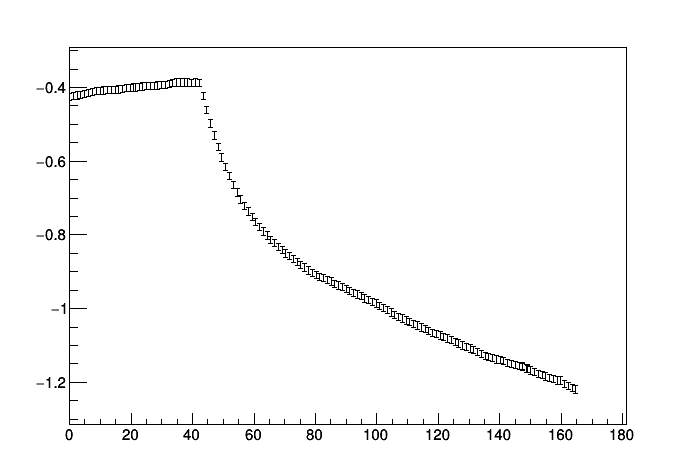

In [5]:
TCanvas *c1 = new TCanvas();
TGraphErrors *g = new TGraphErrors();

double t, vin, evin, range;
for(int j=0; data_table >> t >> vin >> evin >> range; j++){
    g->SetPoint(j, t, vin);
    g->SetPointError(j, 0, 0.01);
}
g->Draw("ap");
c1->Update();
c1->Draw()
    

#### Considerazioni sull'incertezza

Come possiamo fare a valutare il valore di errore sulla misura di tensione?

Abbiamo raccolto un set di dati che rappresentato il valore di tensione letta quando la lampadina era spenta e quando solo la strumentazione era messa in tensione. 

Eseguendo un histo, possiamo effettivamente vedere se i dati si dispongono secondo una gausssiana, e nel caso effettivamente misurare come valore di errore a $1\sigma$ la dev. std. dell'istogramma.

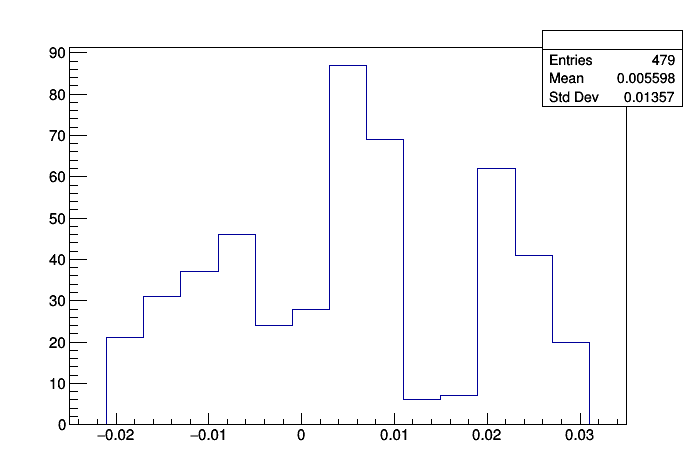

In [14]:
TCanvas c2;
double T, V, eV, range, crange;
std::ifstream file(rumore.c_str());
TH1D hist("", "", 15, -25e-3, 35e-3);
while (file >> T >> V >> eV >> range >> crange){hist.Fill(V);}
hist.Draw("HIST");
c2.Draw();

#### Alcune note finali

Andando ad eseguire un fit lineare sui primi 5/6 punti, ovvero fino a quando possiamo effettivamente osservare un regime lineare, posso trovare la velocità a cui il corpo si scalda. 

#### Valutazione errore

La curva in valutazione errore non presenta una guassiana perfetta. 
Potremmo procedere per batches, ovvero dividendo i punti, che sono effettivamente tanti, in batch da 40/50 punti e poi procedere a misurare RMS su questi valori, a questo punto poi verificarne la compatibilità e quindi verificare come di comportino singolarmente. 